In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.style as style #import matplot style
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


## About Dataset

### Description:
This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

### Key Features:
- **track_name**: Name of the song
- **artist(s)_name**: Name of the artist(s) of the song
- **artist_count**: Number of artists contributing to the song
- **released_year**: Year when the song was released
- **released_month**: Month when the song was released
- **released_day**: Day of the month when the song was released
- **in_spotify_playlists**: Number of Spotify playlists the song is included in
- **in_spotify_charts**: Presence and rank of the song on Spotify charts
- **streams**: Total number of streams on Spotify
- **in_apple_playlists**: Number of Apple Music playlists the song is included in
- **in_apple_charts**: Presence and rank of the song on Apple Music charts
- **in_deezer_playlists**: Number of Deezer playlists the song is included in
- **in_deezer_charts**: Presence and rank of the song on Deezer charts
- **in_shazam_charts**: Presence and rank of the song on Shazam charts
- **bpm**: Beats per minute, a measure of song tempo
- **key**: Key of the song
- **mode**: Mode of the song (major or minor)
- **danceability_%**: Percentage indicating how suitable the song is for dancing
- **valence_%**: Positivity of the song's musical content
- **energy_%**: Perceived energy level of the song
- **acousticness_%**: Amount of acoustic sound in the song
- **instrumentalness_%**: Amount of instrumental content in the song
- **liveness_%**: Presence of live performance elements
- **speechiness_%**: Amount of spoken words in the song


### Potential Use Cases:
- **Music analysis**: Explore patterns in audio features to understand trends and preferences in popular songs.
- **Platform comparison**: Compare the song's popularity across different music platforms.
- **Artist impact**: Analyze how artist involvement and attributes relate to a song's success.
- **Temporal trends**: Identify any shifts in music attributes and preferences over time.
- **Cross-platform presence**: Investigate how songs perform across different streaming services.

If you find this dataset useful, your support through an upvote would be greatly appreciated ❤️🙂

Thank you

In [119]:
file_path = '/kaggle/input/top-spotify-songs-2023/spotify-2023.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

## Cleaning

There are a couple of cleaning to be done here;

1. check for duplicate rows
2. incorrect column datatype

In [120]:
df_copy = df.copy() #get a copy
songs = df_copy[['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
        'danceability_%', 'energy_%']]

let's check for duplicates and drop them were neccesary

In [121]:
duplicates = songs[songs[['track_name','artist(s)_name']].duplicated()]
songs = songs.drop(duplicates.index.tolist())
songs.reset_index(drop=True, inplace=True) #reset index

Some of the datatype for the columns are wrong.let's fix that.

In [122]:
# Remove non-numeric characters from the 'streams' column
songs['streams'] = songs['streams'].str.replace(r'\D', '', regex=True)

# Convert the 'streams' column to integers
songs['streams'] = pd.to_numeric(songs['streams'])

In [123]:
songs['in_shazam_charts'] = songs['in_shazam_charts'].str.replace(',','')

# Fill NaN values with 0 in the 'in_shazam_charts' column
songs['in_shazam_charts'].fillna(0, inplace=True)

# Convert the 'in_shazam_charts' column to integers
songs['in_shazam_charts'] = songs['in_shazam_charts'].astype(int)

songs['in_deezer_playlists'] = songs['in_deezer_playlists'].str.replace(',', '')
songs['in_deezer_playlists'] = songs['in_deezer_playlists'].astype(int)

I can see that there are songs here released as far back as 1930 in this data. We are going to limit our data to songs released atmost 1980.

In [124]:
songs = songs[songs['released_year'] > 1979] 

In [125]:
# i may need to use a litlle bit of regex or google translator for some of the track_names. 


#style.available #let's see available style themes

#!pip install googletrans #import module
#!pip install langdetect

## 2. Analysis

1. What are the top 5 tracks with the highest number of streams across all platforms?
2. Is there any noticeable relationship between the danceability percentage and the energy level of the songs?
3. Which artist(s) has/have the most songs in Spotify playlists?
4. How do the number of streams vary across different released years?
5. Are there any particular months in which songs tend to perform better in terms of charts and playlists?
6. What is the average number of charts a song appears on across Spotify, Apple, and Deezer?
7. How does the average danceability percentage differ between songs with more than one artist and those with a single artist?
8. Are there any trends in the distribution of the number of songs released over the years?
9. What is the average number of streams for songs with a danceability percentage greater than 70%?
10. Is there any correlation between the number of streams and the position on Shazam charts for the songs?
11. How does the number of streams compare between solo artists and collaborative tracks?
12. Are there any seasonal trends in the popularity of certain genres or artists?
13. What is the distribution of danceability percentages for songs released in different years?
14. How do the energy levels of songs differ across various streaming platforms?
15. Are there any specific patterns in the distribution of tracks across different levels of in-app playlists?
16. How do the song attributes vary between different artists with varying numbers of tracks in the charts?
17. Is there a correlation between the release date of a song and its position on the Deezer charts?
18. What is the overall trend in the popularity of music over the years based on the number of streams and chart positions?
19. How does the position on Spotify playlists impact the position on Apple Music charts?
20. What is the average position on Shazam charts for songs with a danceability percentage below 50% and energy level above 75%?

### 1. What are the top 5 tracks with the highest number of streams across all platforms

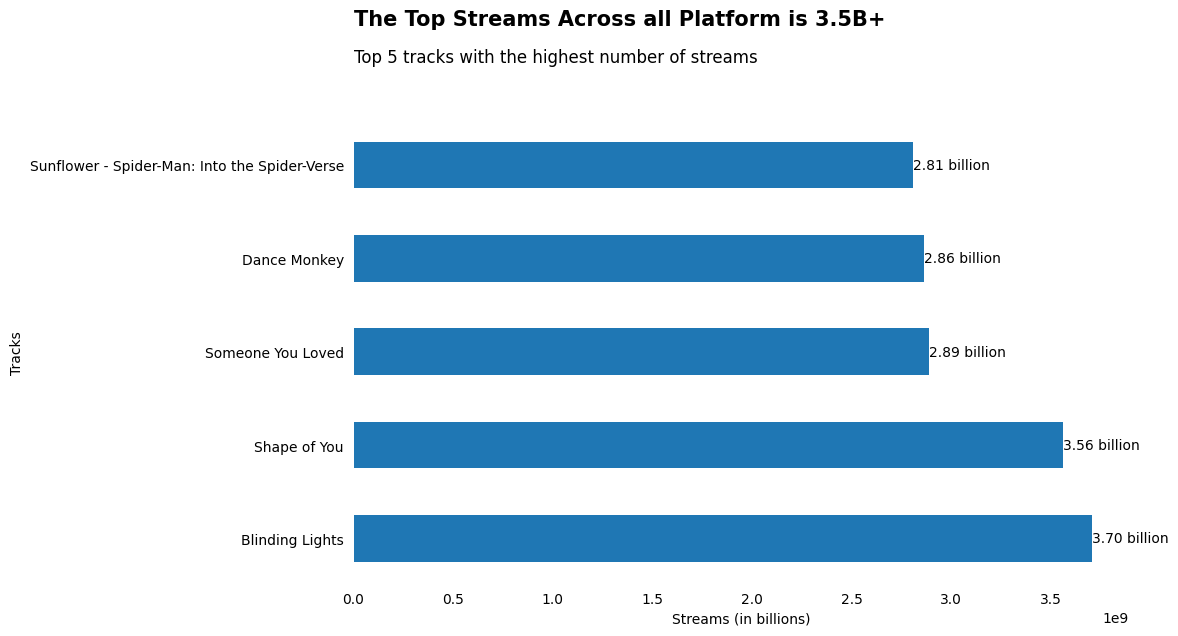

In [126]:
top_5_streams = songs.nlargest(5,columns = ['streams'])

fig, ax = plt.subplots(figsize=(10,6))
bar_container = ax.barh(top_5_streams['track_name'], top_5_streams['streams'], height = 0.5);
ax.set(xlabel='Streams (in billions)',ylabel= 'Tracks')
ax.bar_label(bar_container, fmt=lambda x: f'{x / 10**9:.2f} billion')

#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)
    
#remove x and y ticks
ax.tick_params(bottom=False,left=False)
#ax.set_xticks([0.0, 1.0, 2.0, 3.5]);

#set titles
ax.text(x=0.5, y=5.5, s='The Top Streams Across all Platform is 3.5B+',
        size=15, weight='bold')
ax.text(x=0.5, y=5.1, s='Top 5 tracks with the highest number of streams',
        size=12);

### 2. Is there any noticeable relationship between the danceability percentage and the energy level of the songs?

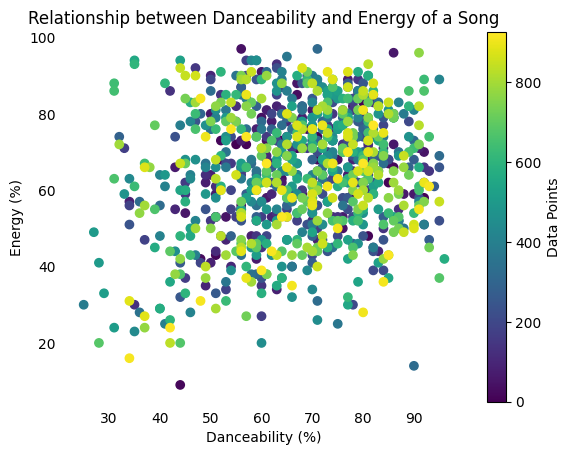

In [127]:
# Using different colors for each column
fig, ax = plt.subplots()
scatter = ax.scatter(songs['danceability_%'], songs['energy_%'], c=range(len(songs)), cmap='viridis')

# Adding labels and title
ax.set_xlabel('Danceability (%)')
ax.set_ylabel('Energy (%)')
ax.set_title('Relationship between Danceability and Energy of a Song')

# Adding a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Data Points')

#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)
    
#remove x and y ticks
ax.tick_params(bottom=False,left=False);

In general, there is no relationship between energetic songs and their danceability. Let's take this a step higher and check if bad_bunny songs are both enrgetic and danceable

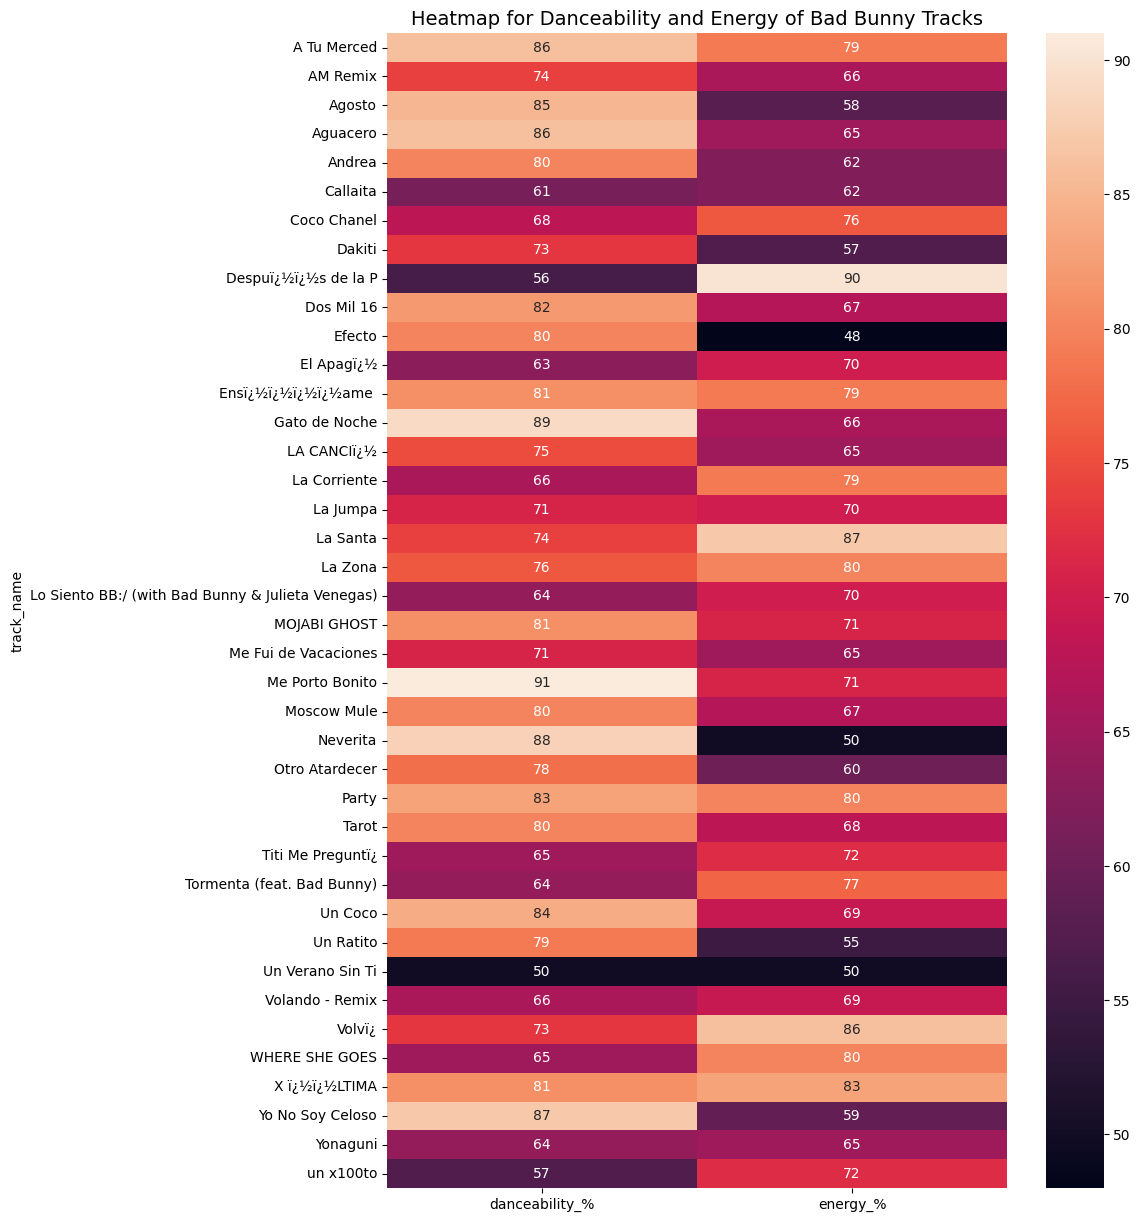

In [128]:
data = songs[['track_name', 'danceability_%', 'energy_%']][songs['artist(s)_name'].str.contains ('Bad Bunny')]

# Using pivot_table to pivot the data by 'track_name'
pivot_df = pd.pivot_table(data, values=['danceability_%', 'energy_%'], index='track_name')

# Increasing the size of the heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(pivot_df, annot=True)

plt.title('Heatmap for Danceability and Energy of Bad Bunny Tracks', fontsize=14);

From the heatmap, i can see that most bad bunny aren't very energeic. Only a handful are both energetic and dance to;

1. A tu Merced

### 3. Which artist(s) has/have the most songs in Spotify playlists?

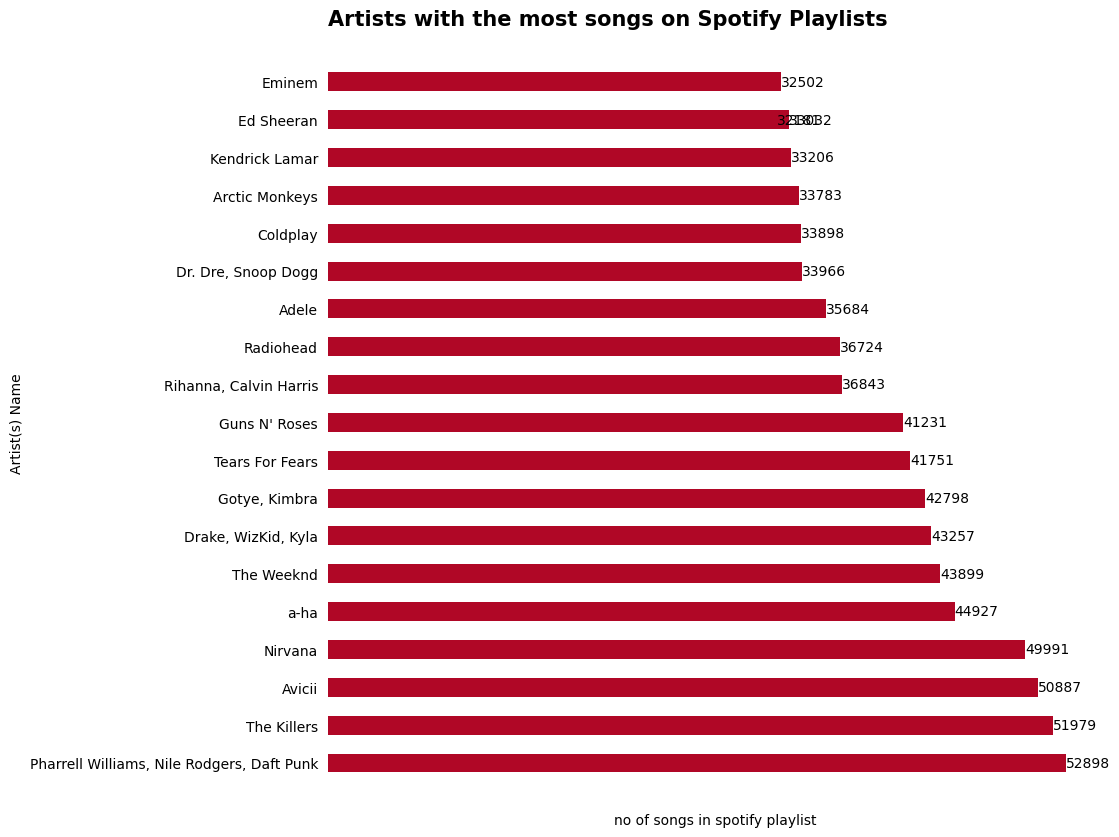

In [129]:
spotify_playlist = songs[['artist(s)_name',
                          'in_spotify_playlists']].nlargest(20, columns =['in_spotify_playlists']) #select top 20

x= spotify_playlist['artist(s)_name']
y = spotify_playlist['in_spotify_playlists']

fig, ax = plt.subplots(figsize=(10,10))
bar_container = ax.barh(x,y, height =0.5, color='#b00726');
ax.set(xlabel='no of songs in spotify playlist',ylabel= 'Artist(s) Name')
ax.bar_label(bar_container, fmt=lambda x: f'{x:.0f}')

#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)
    
#remove x and y ticks
ax.tick_params(bottom=False,left=False)
ax.set_xticks([])  # Remove x-ticks

#set titles
ax.text(x=0.5, y=19.5, s='Artists with the most songs on Spotify Playlists',
        size=15, weight='bold');

### 4. How do the number of streams vary across different released years?

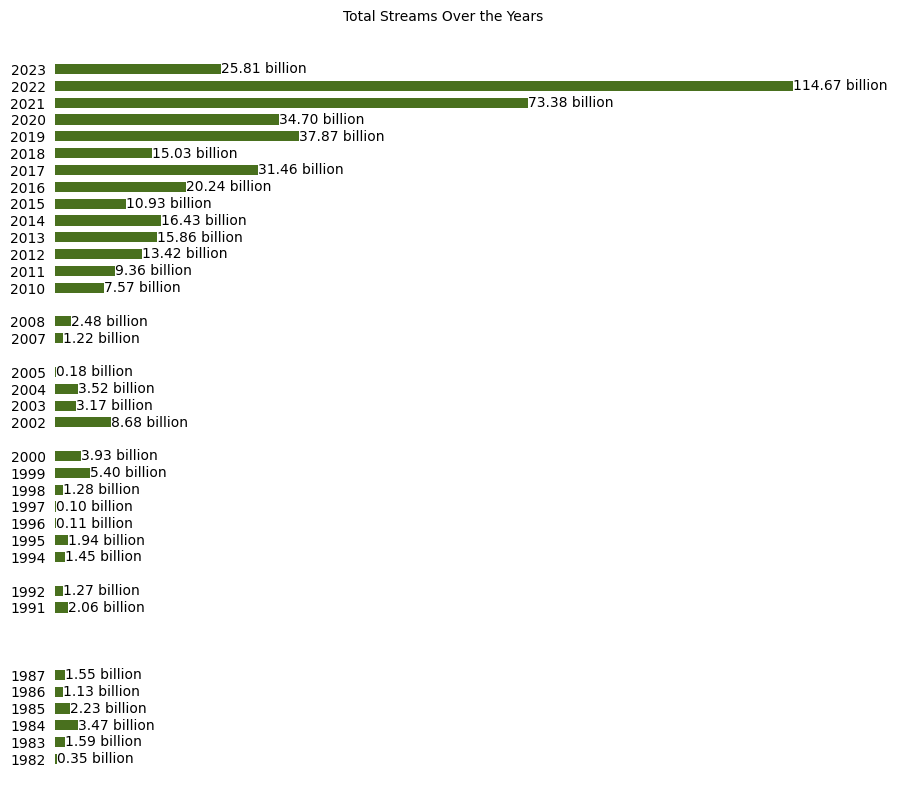

In [130]:
# Grouping the data by 'released_year' and calculating the total streams for each year
streams_by_year = songs.groupby('released_year')['streams'].sum()

fig,ax = plt.subplots(figsize=(10,10))
bar_container = ax.barh(streams_by_year.index,streams_by_year,height=0.6,color='#49701e')
ax.bar_label(bar_container, fmt=lambda x: f'{x / 10**9:.2f} billion')


# Show all the years on the y-axis
ax.set_yticks(streams_by_year.index)
ax.set_yticklabels(streams_by_year.index)

#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)
    
#remove x and y ticks
ax.tick_params(bottom=False,left=False)
ax.set_xticks([])  # Remove x-ticks

#set titles
ax.set_title('Total Streams Over the Years',fontsize=10);

### 5. Are there any particular months in which songs tend to perform better in terms of charts and playlists?

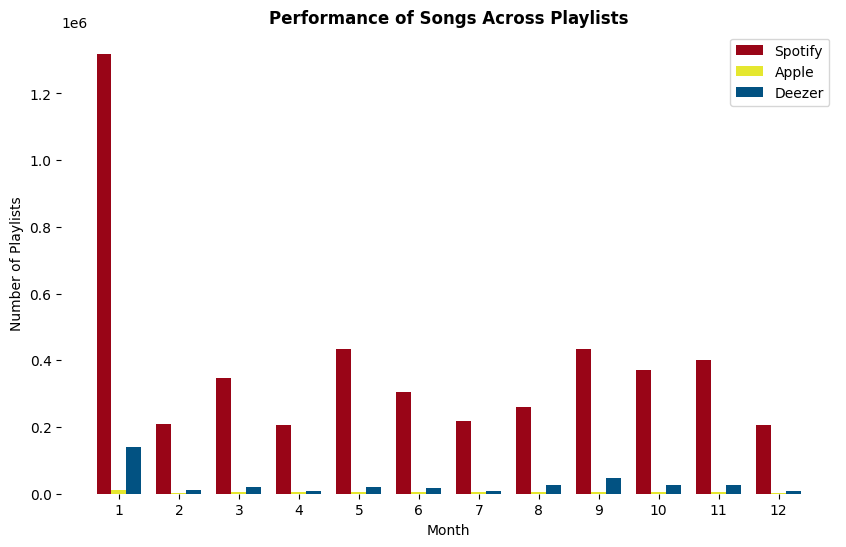

In [150]:
# Grouping the data 
playlist_by_month = songs.groupby('released_month')[['in_spotify_playlists',
                                            'in_apple_playlists','in_deezer_playlists']].sum()

# Create the index for the bars
months = playlist_by_month.index

# Define the bar width
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(r1, playlist_by_month['in_spotify_playlists'], color='#990517', width=bar_width, label='Spotify')
ax.bar(r2, playlist_by_month['in_apple_playlists'], color='#e5e72f', width=bar_width, label='Apple')
ax.bar(r3, playlist_by_month['in_deezer_playlists'], color='#025282', width=bar_width, label='Deezer')

# Add labels and title
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Number of Playlists', fontsize=10)
ax.set_title('Performance of Songs Across Playlists', fontweight='bold', fontsize=12)
ax.set_xticks([r + bar_width for r in range(len(months))])
ax.set_xticklabels(months)
ax.legend()

#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)
    
#remove x and y ticks
ax.tick_params(bottom=False,left=False)
#ax.set_xticks([])  # Remove x-ticks

It looks like January is teh best time to release a song and it will be uploaded on many playlists

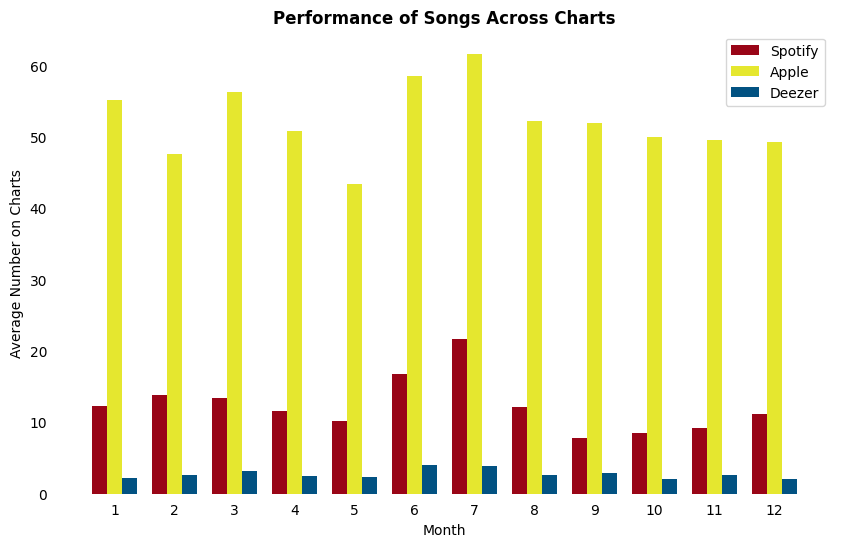

In [158]:
# Grouping the data 
charts_by_month = songs.groupby('released_month')[['in_spotify_charts',
                                            'in_apple_charts','in_deezer_charts']].mean()

# Create the index for the bars
months = charts_by_month.index

# Define the bar width
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(r1, charts_by_month['in_spotify_charts'], color='#990517', width=bar_width, label='Spotify')
ax.bar(r2, charts_by_month['in_apple_charts'], color='#e5e72f', width=bar_width, label='Apple')
ax.bar(r3, charts_by_month['in_deezer_charts'], color='#025282', width=bar_width, label='Deezer')

# Add labels and title
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Average Number on Charts', fontsize=10)
ax.set_title('Performance of Songs Across Charts', fontweight='bold', fontsize=12)
ax.set_xticks([r + bar_width for r in range(len(months))])
ax.set_xticklabels(months)
ax.legend()

#remove spines
for location in ['top','bottom','left','right']:
    ax.spines[location].set_visible(False)
    
#remove x and y ticks
ax.tick_params(bottom=False,left=False)
#ax.set_xticks([])  # Remove x-ticks

## Final Thoughts

you can answer the rest of the questions on your own. Also, consider using regex to convert the words with symbols.

Good luck!